Write a Medium post on analyzing the structure of a Web-based network. Relevant networks or graphs include the Web graph (e.g., edges between domains or edges between articles in a single web site) or online social networks. In your analysis, define what it means for a node to be "important" and describe how you might find such a node in the graph.

Your post should include the following:

* Describe a question you think can be answered using network data, what specific stakeholder is asking this question, and what decision(s) the answer to this question will inform.
* Describe the data that could answer this question, what fields it contains, and why it is relevant to your question.
* Explain how you collected some subset of this data (e.g., libraries like requests, BeautifulSoup, tweepy, praw, etc. or from data archive).
* Define what entity is represented by a node/vertex in the graph, and what relationship between these nodes does an edge represent.
* Define "importance" in your graph and identify a set of at least three important nodes.
* Provide an answer to your question, explaining your analysis of the data you collected, and how it answers that question.
* Include figures or tables summarizing your findings. 
* Describe how you cleaned up this data, common bugs you think others might encounter, and how you fixed them, etc.
* Discuss the limitations of your analysis. What’s missing? How might it be biased?
* Include a link to one of your GitHub repositories that contains the code you have developed for this assignment.

In [1]:
import numpy as np
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def get_links_for_page(api_url, city_title):
    params = {
        "action": "query",
        "format": "json",
        "titles": city_title,
        "prop": "links",
        "pllimit": "max"
    }

    links = []
    response = requests.get(api_url, params=params)
    data = response.json()
    
    pages = data['query']['pages']
    for page_id in pages:
        if 'links' in pages[page_id]:
            links += [link['title'] for link in pages[page_id]['links']]

    return links

In [3]:
def build_network(api_url, city_title): # Note that this only calls the first layers of links, can extend the depth but would lead to very high computational time
    network = {city_title: []}
    links_to_visit = []
    links_to_visit.append(city_title)

    for title in links_to_visit:
        links = get_links_for_page(api_url, title)
        network[title] = links
    return network

In [4]:
api_url = "https://en.wikipedia.org/w/api.php"

# Picking ten large US cities by population according to Investopedia
city_titles = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

# Creating a dictionary contain our cities with associated articles
full_network = {}
for city in city_titles:
    full_network[city] = build_network(api_url, city)

In [5]:
full_network.keys()

dict_keys(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose'])

In [6]:
# Creating graph
g = nx.Graph()
for city in city_titles:
    g.add_node(city)
    edge_list = full_network[city][city]
    for edge in edge_list:
        g.add_edge(city, edge)

In [7]:
degree_centrality = nx.degree_centrality(g)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

In [8]:
sorted_degree_centrality[:10] # First ten to only show the cities

[('Chicago', 0.15877000313774708),
 ('Dallas', 0.1584562284279887),
 ('Houston', 0.1575149042987135),
 ('Los Angeles', 0.15688735487919672),
 ('Philadelphia', 0.15688735487919672),
 ('San Antonio', 0.15688735487919672),
 ('San Diego', 0.15688735487919672),
 ('Phoenix', 0.07059930969563853),
 ('New York', 0.02165045497332915),
 ('San Jose', 0.006275494195167869)]

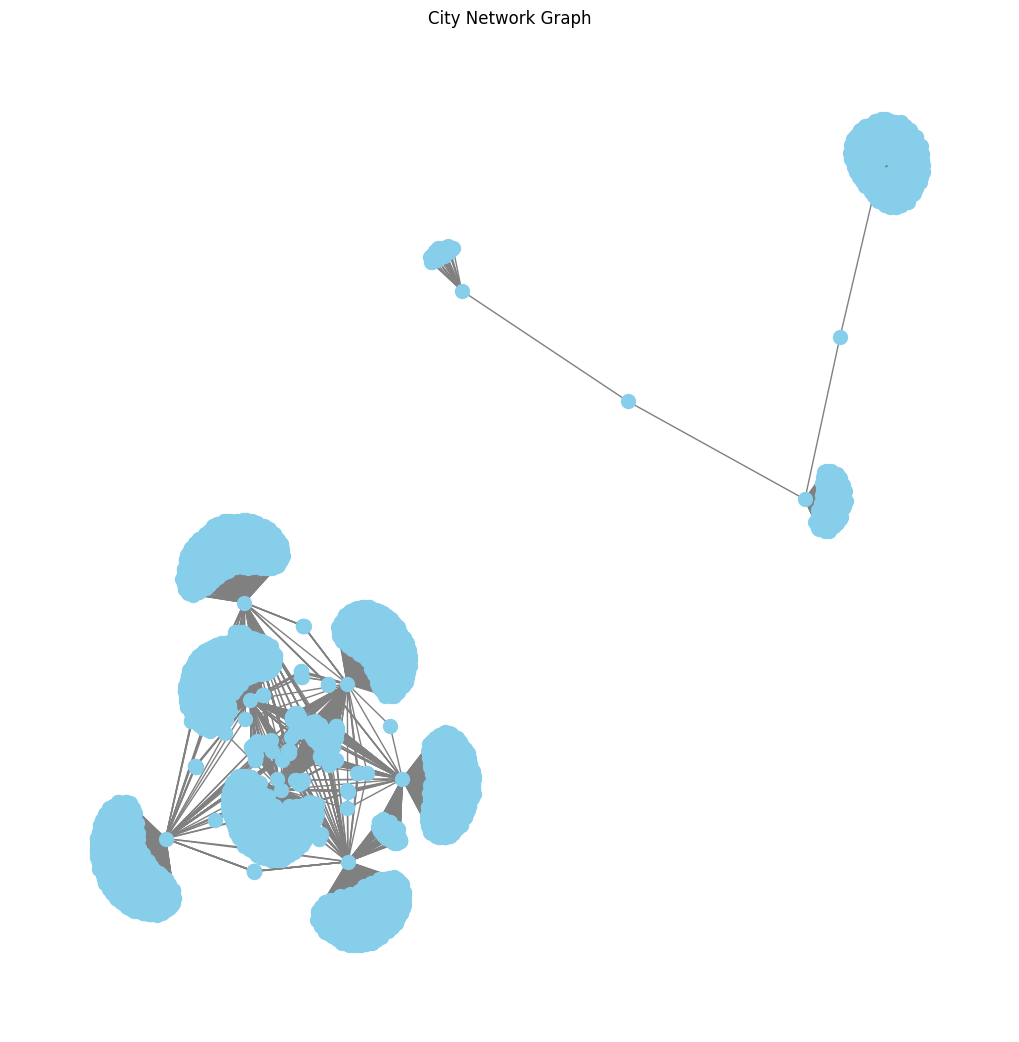

In [16]:
plt.figure(figsize=(10, 10))  # Set the figure size

# Draw the graph with node labels
pos = nx.spring_layout(g)  # Layout for a clean presentation
nx.draw(g, pos, with_labels=False, node_size=100, node_color="skyblue", 
        font_size=1, edge_color="gray")

# Show the plot
plt.title("City Network Graph")
plt.show()